### Assignment 3: EDA and Prediction with Logistic Regression 

### You must push a version before next Thursday at class time! 

### The Heart Disease Prediction dataset provides vital insight in the relationship between risk factors and cardiac health. This dataset contains 270 case studies of individuals classified as either having or not having heart disease based on results from cardiac catheterizations - the gold standard in heart health assessment. Each patient is identified by 13 independent predictive variables revealing their age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of vessels seen on fluoroscopy showing narrowing of their coronary arteries

In [23]:
import pandas as pd  
heart = pd.read_csv('Heart.csv')
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

### 2. Use pandas method to summarize the properties of the data. Use `head` and `info` and `.value_counts` and `describe` pandas methods to explore the data. 
### Identify which variables are categorical, and which variables are numeric.For categorical data, use `.value_counts` to identify any variables that are highly imbalanced.  
### Are there any missing data? 
### What is the primary target variable (i.e., variable to predict).  Are there any interesting secondary variables to predict? 
### After your exploration, write a few sentences in a markdown box to comment on these questions.  

In [2]:
heart.describe()


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [3]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [5]:
heart.value_counts

<bound method DataFrame.value_counts of      Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Sl

In [6]:
col = heart.columns

### 2.  Use Seaborn to explore the numeric data graphically. Two goals here. First, are there any variables that are highly correlated with each other.  Second, are there any variables that seem likely to be helpful in building a model that can predict heart disease. Write your hypothesis in the markdown box provided.  

In [7]:
heart['Chol'].value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
340    1
160    1
394    1
184    1
131    1
Name: Chol, Length: 152, dtype: int64

C:\Users\galve\AppData\Local\Temp\ipykernel_9676\2949902094.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(predictors.corr(), vmin=-1, vmax=1, cmap= "jet",annot=True)


<Axes: >

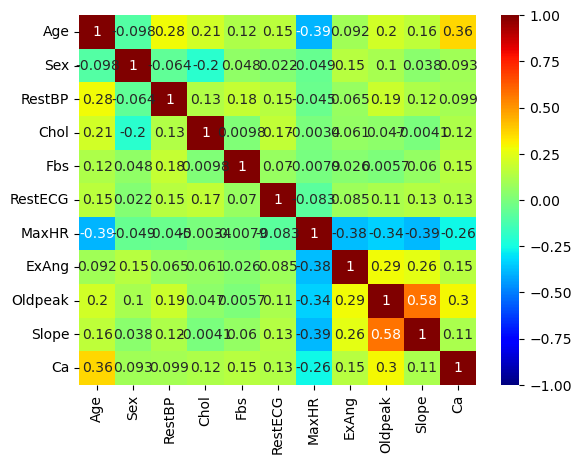

In [8]:
heart_disease = heart['AHD']
predictors = heart[col[1:13]] #From whole dataset I want columns 1 through 13
sns.heatmap(predictors.corr(), vmin=-1, vmax=1, cmap= "jet",annot=True)

c:\Users\galve\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


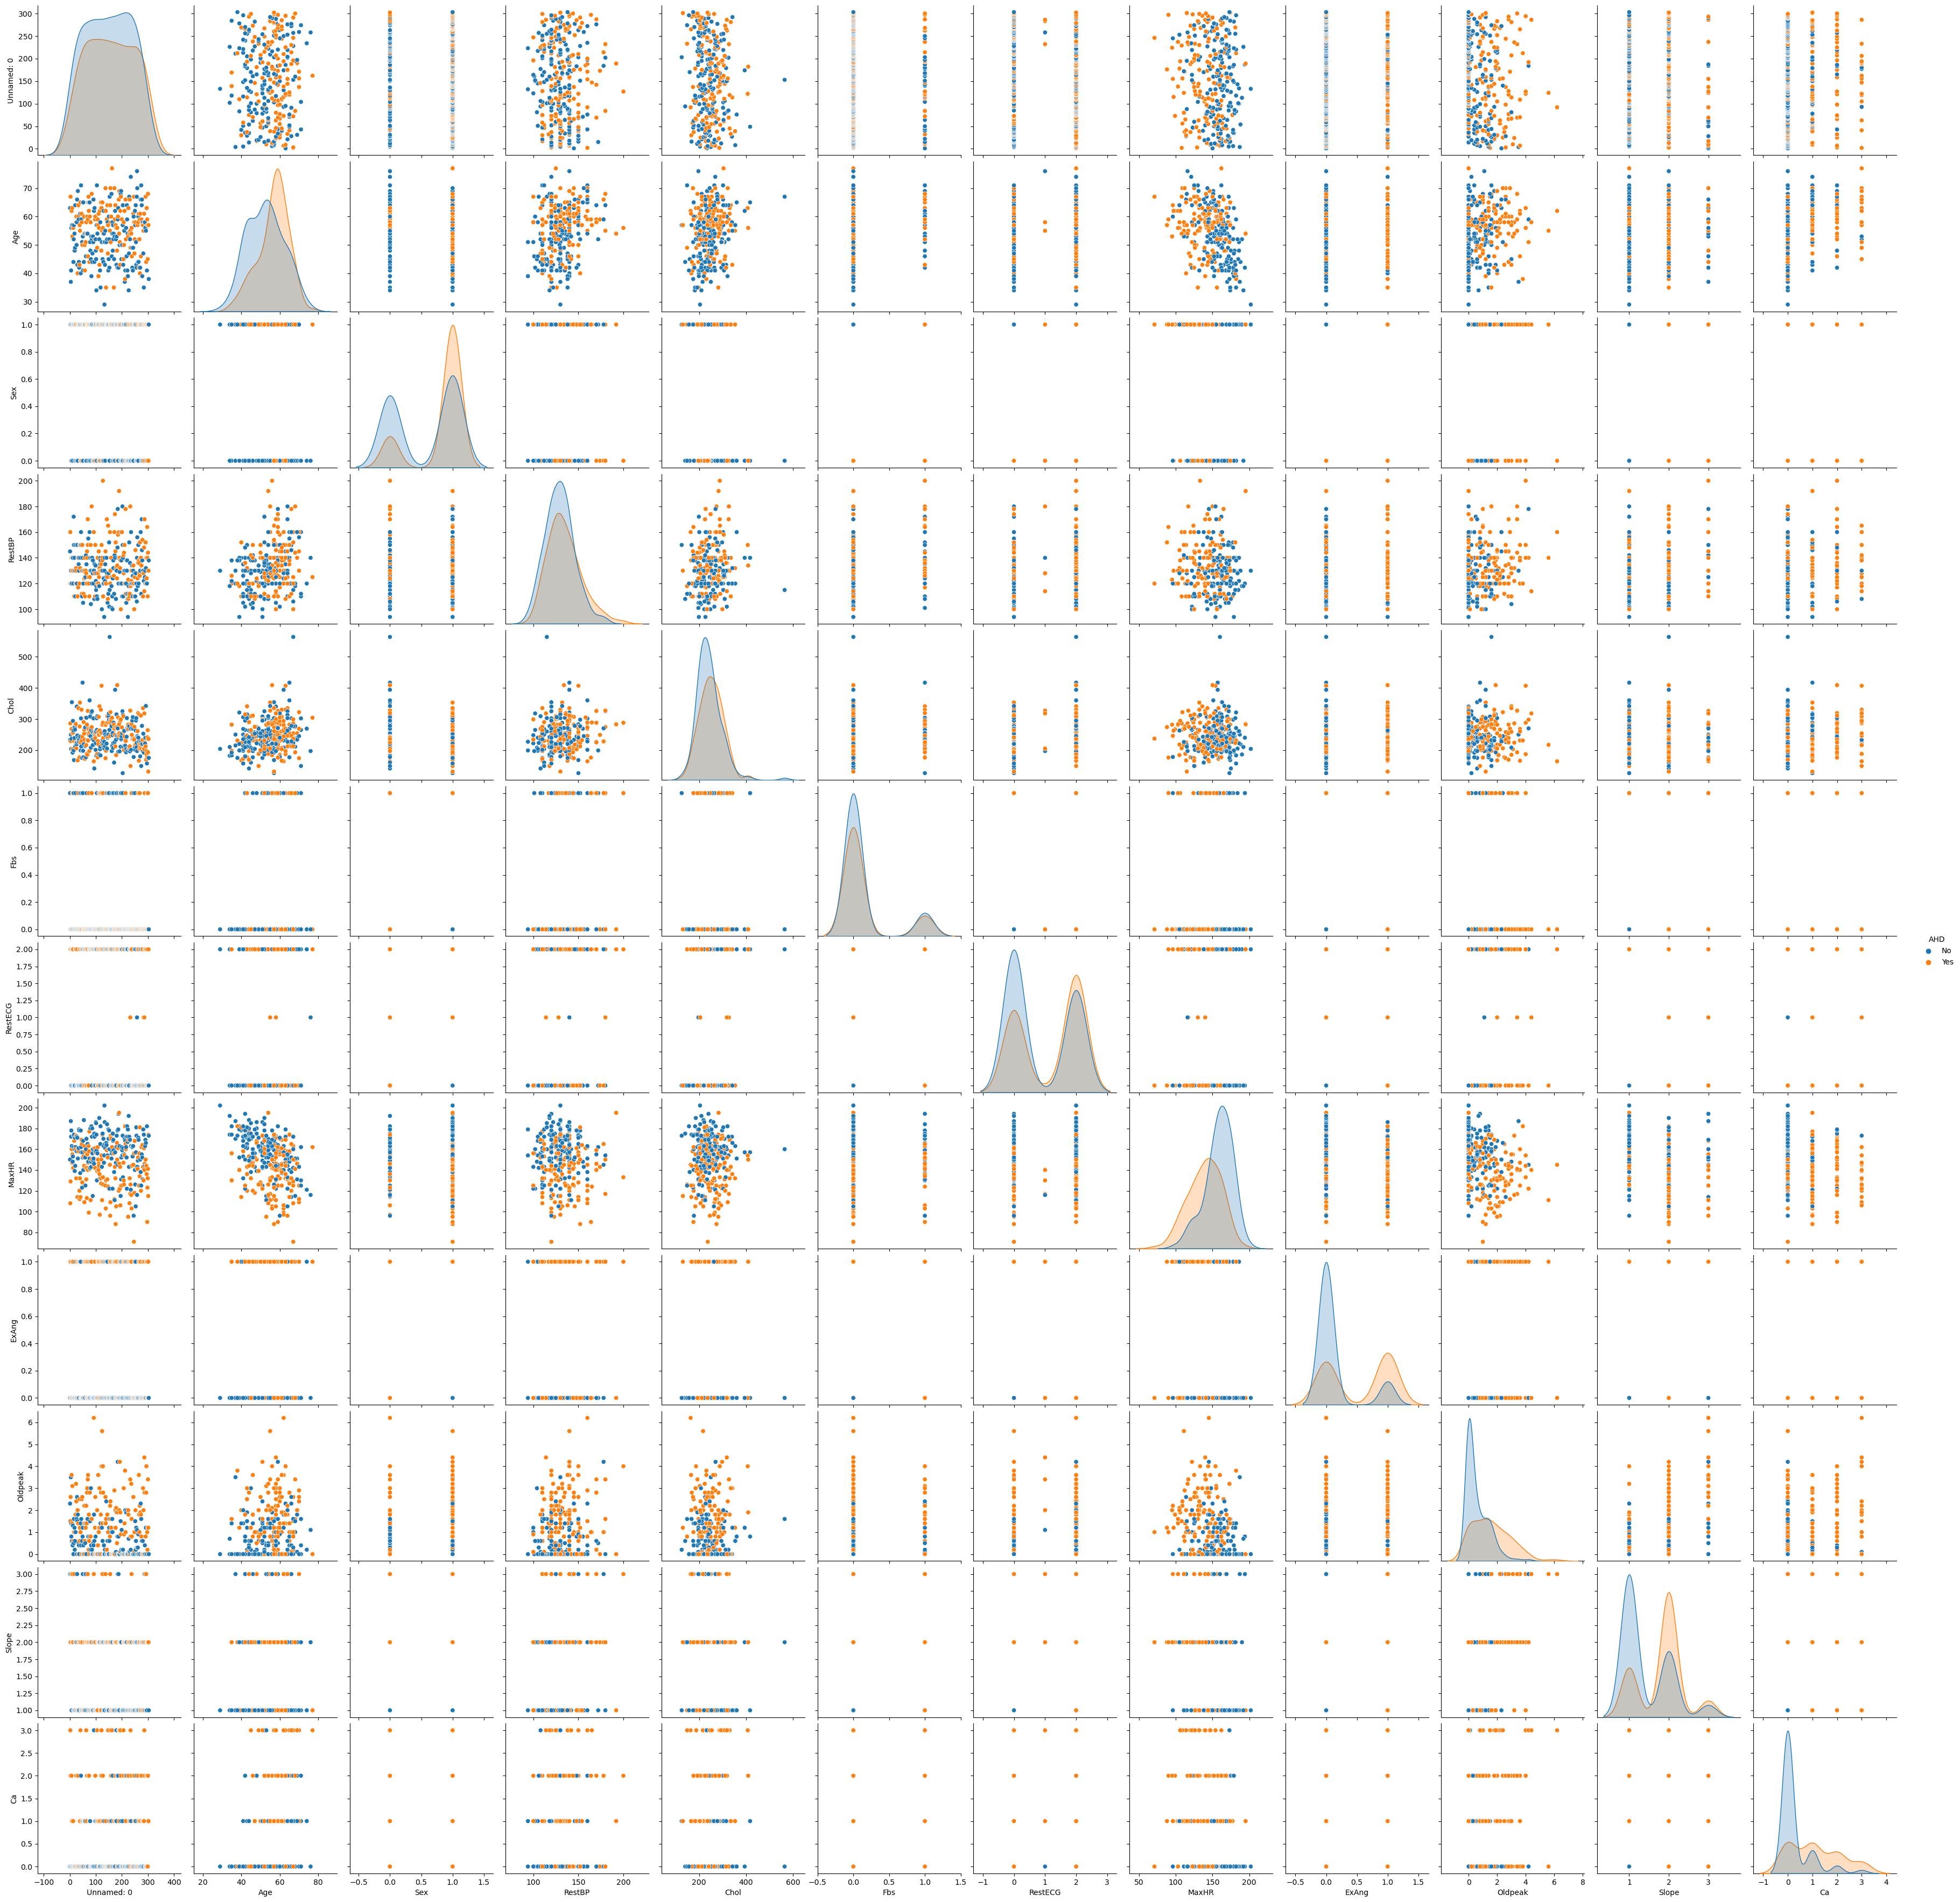

In [43]:
sns.pairplot(heart,hue = 'AHD', size = 3)

After most being correlated with themselves, slope and Oldpeak are the next highly correlated variables. 
Secondly, age and resting blood pressure are predicators that would see a higher probability of getting heart disease. 

### 3. As the analysis plan is to use a Logistic Regression model, all variables will need to be converted to numeric representations. One way to do this is `pd.get_dummies` which I give an example below. The other way to do it is to use .map method and define an encoder. 

### I show both approaches below.  Typically, if there is an obvious hierarchical relationship, I might use my own encoder to express that.  If there isnt, get_dummies is more sensible then a hierarchical approach

### After you encode the heart data, feel free to delete my example code.  

In [10]:
encoder_chestpain = {
    'typical':1,
    'asymptomatic':2,
    'nonanginal':3,
    'nontypical':4,
}

encoder_Thal= {
    'fixed':1,
    'normal':2,
    'reversible':3,
}

encoder_AHD= {
    'No':0,
    'Yes':1,
}
chestpain_encoder = heart['ChestPain'].map(encoder_chestpain ) #Three new columns
thal_encoder = heart['Thal'].map(encoder_Thal)
ahd_encoder = heart['AHD'].map(encoder_AHD)

heart['ChestPain'] = chestpain_encoder #changing values into numberic ones
heart['Thal'] = thal_encoder
heart['AHD'] = ahd_encoder

print(heart.dtypes)

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain       int64
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal          float64
AHD             int64
dtype: object


### 4. We are going to have to decide how we want to cross-validate the models we build. First split the data into training and test data (using `train_test_split`). I recommend 25% test set data.   Then using the training data only, make use of K-fold cross validation to create multiple training and test sets. I recommend doing 5-folds.    

In [12]:
heart = heart.dropna()
heart_disease = heart['AHD']
predictors = heart[col[1:13]]
predictors_train,predictors_test,heartdisease_train,heartdisease_test = train_test_split(predictors,heart_disease,test_size = 0.25,random_state = 16)
#print(predictors_train)
print(heartdisease_train)

134    0
229    1
200    0
265    1
63     0
      ..
219    0
111    1
117    0
217    0
278    1
Name: AHD, Length: 136, dtype: int64


In [30]:
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(predictors_train):
    p_train,p_test = predictors_train.iloc[train_index], predictors_train.iloc[test_index]
    h_train,h_test = heartdisease_train.iloc[train_index], heartdisease_train.iloc[test_index]


### 5. Fit a logistic regression model on the training data using K-fold cross-validation to first assess model fit. Your assessment should include accuracy, confusion matrix, and ROC curve.     

In [32]:
logreg = LogisticRegression(random_state=16,max_iter = 5000)
logreg.fit(p_train, h_train)
heartdisease_predk = logreg.predict(p_test)
print(heartdisease_predk)

[0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


In [33]:
correct = (heartdisease_predk==h_test)
ncorrect = np.sum(correct)
pctcorrect = 100*ncorrect/len(h_test)
print(pctcorrect)

81.48148148148148


In [34]:
cnf_matrix = metrics.confusion_matrix(h_test, heartdisease_predk)
print(cnf_matrix)

[[18  1]
 [ 4  4]]


([<matplotlib.axis.YTick at 0x19f1143ce90>,
 [Text(0, 0.5, 'Undiagnosed'), Text(0, 1.5, 'Heart Disease')])

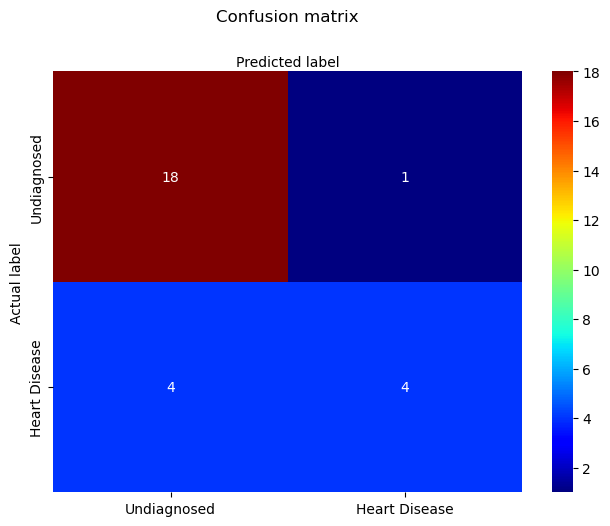

In [35]:
class_names=['Undiagnosed','Heart Disease'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)

In [36]:
print(metrics.classification_report(h_test,heartdisease_predk,target_names=class_names))

               precision    recall  f1-score   support

  Undiagnosed       0.82      0.95      0.88        19
Heart Disease       0.80      0.50      0.62         8

     accuracy                           0.81        27
    macro avg       0.81      0.72      0.75        27
 weighted avg       0.81      0.81      0.80        27



In [41]:
heartdisease_pprobk = logreg.predict_proba(p_test)

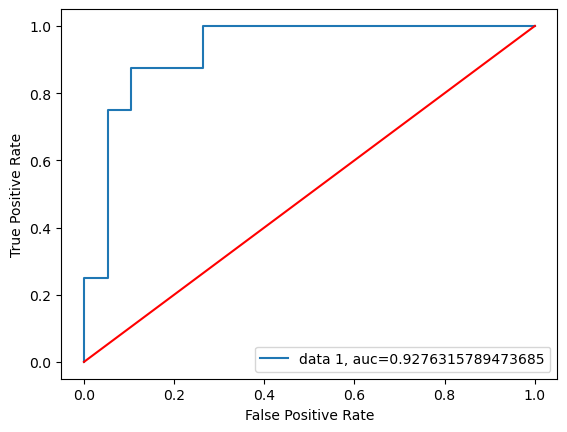

In [42]:
fpr, tpr, _ = metrics.roc_curve(h_test,heartdisease_pprobk[:,1])
auc = metrics.roc_auc_score(h_test, heartdisease_pprobk[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### 6. Fit a logistic regression model using all the training data and test it on the test data.  Provide accuracy, confusion matrix, and ROC curve.

In [15]:
logreg = LogisticRegression(random_state=16,max_iter = 5000)
logreg.fit(predictors_train, heartdisease_train)
heartdisease_pred = logreg.predict(predictors_test)
print(heartdisease_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0]


In [17]:
correct = (heartdisease_pred==heartdisease_test)
ncorrect = np.sum(correct)
pctcorrect = 100*ncorrect/len(heartdisease_test)
print(pctcorrect)

82.6086956521739


In [20]:
cnf_matrix = metrics.confusion_matrix(heartdisease_test, heartdisease_pred)
print(cnf_matrix)

[[31  2]
 [ 6  7]]


([<matplotlib.axis.YTick at 0x19f111a1190>,
 [Text(0, 0.5, 'Undiagnosed'), Text(0, 1.5, 'Heart Disease')])

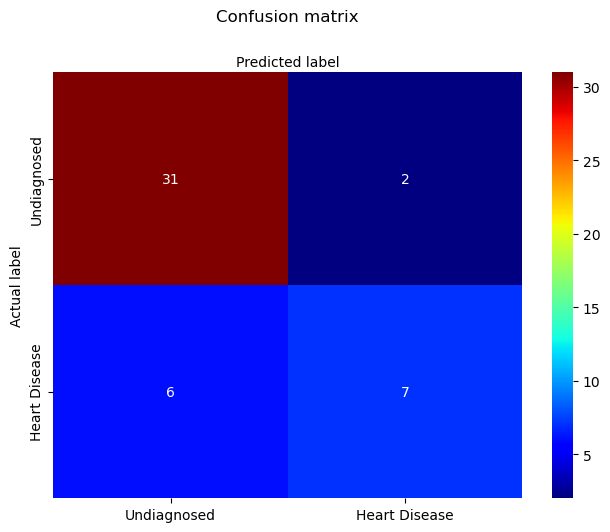

In [24]:
class_names=['Undiagnosed','Heart Disease'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)


In [25]:
print(metrics.classification_report(heartdisease_test,heartdisease_pred,target_names=class_names))

               precision    recall  f1-score   support

  Undiagnosed       0.84      0.94      0.89        33
Heart Disease       0.78      0.54      0.64        13

     accuracy                           0.83        46
    macro avg       0.81      0.74      0.76        46
 weighted avg       0.82      0.83      0.82        46



In [27]:
heartdisease_pprob = logreg.predict_proba(predictors_test)

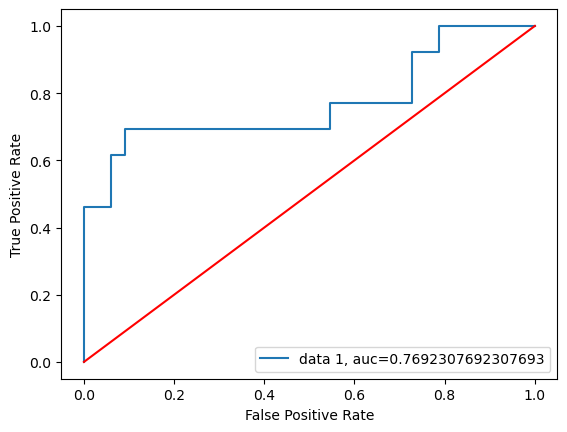

In [29]:
fpr, tpr, _ = metrics.roc_curve(heartdisease_test,heartdisease_pprob[:,1])
auc = metrics.roc_auc_score(heartdisease_test, heartdisease_pprob[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### 7.Examine your model to determine if you can understand what features and criterion it is using to classify the data. Write your descriptive answer in the markdown box.   